/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:            sedim_thick   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -108.677
Date:                Thu, 20 Jun 2019   AIC                            225.354
Time:                        18:34:05   BIC                            230.066
Sample:                             0   HQIC                           226.604
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8019      2.957     -0.609      0.542      -7.597       3.993
ar.L1          0.2696      0.390      0.692      0.489      -0.494       1.033
ma.L1         -0.6914      0.414     -1.669      0.0

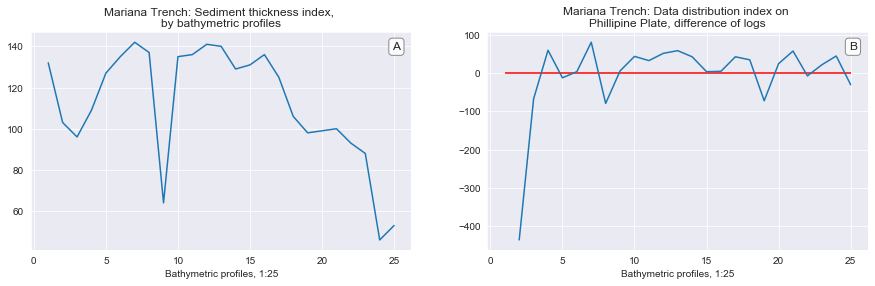

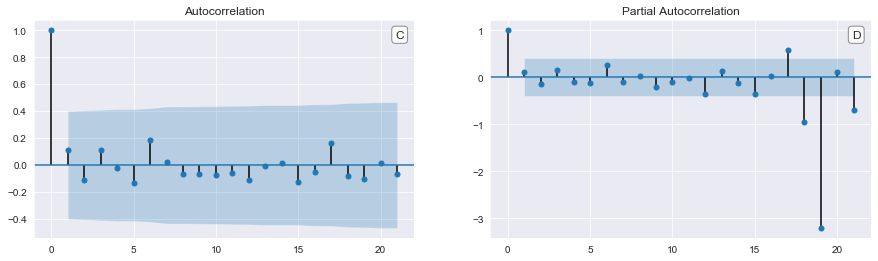

In [19]:
#!/usr/bin/env python
# coding: utf-8
import os
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
import seaborn as sns

sns.set_style('darkgrid')

os.chdir('/Users/pauline/Documents/Python')
data = pd.read_csv("Tab-Morph.csv")
data.index = data.profile

# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['sedim_thick'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

# Dataset
data['ln_wpi'] = np.log(data['sedim_thick'])
data['D.ln_wpi'] = data['plate_phill'].diff()

# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4), dpi=300)

# Levels
axes[0].plot(data.index._mpl_repr(), data['sedim_thick'], '-')
axes[0].set_xlabel('Bathymetric profiles, 1:25', fontsize=10)
axes[0].set(title='Mariana Trench: Sediment thickness index, \nby bathymetric profiles')
axes[0].annotate('A', xy=(0.95, .92), xycoords="axes fraction", fontsize=12,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set_xlabel('Bathymetric profiles, 1:25', fontsize=10)
axes[1].set(title='Mariana Trench: Data distribution index on \nPhillipine Plate, difference of logs');
axes[1].annotate('B', xy=(0.95, .92), xycoords="axes fraction", fontsize=12,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))

# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4), dpi=300)

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=21, ax=axes[0])
axes[0].annotate('C', xy=(0.95, .92), xycoords="axes fraction", fontsize=12,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))

fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=21, ax=axes[1])
axes[1].annotate('D', xy=(0.95, .92), xycoords="axes fraction", fontsize=12,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))

plt.show()
